<a href="https://colab.research.google.com/github/matchbou/Public/blob/master/bigquery_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
```
Copyright 2019 Google LLC

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at

https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.
```
---

# BigQuery ML で出生体重を予測


このノートブックでは、BigQueryの[Publicデータセット](https://bigquery.cloud.google.com/table/bigquery-public-data:samples.natality)を使用して出生時体重を予測しています。

このデータには、1969年から2008年までの米国の[出生に関する詳細](https://bigquery.cloud.google.com/table/publicdata:samples.natality?tab=details)が含まれています。

BigQueryの詳細は [BigQuery ドキュメント](https://cloud.google.com/bigquery/docs) および [ライブラリリファレンスドキュメント](https://googleapis.github.io/google-cloud-python/latest/bigquery/usage/index.html)を参照してください。

## 事前準備


1.   まだ作成していない場合は [Google Cloud Platform プロジェクト](https://console.cloud.google.com/cloud-resource-manager)を作成します。 
2.   [課金設定](https://support.google.com/cloud/answer/6293499#enable-billing) を有効にします。
3.   [BigQuery API](https://console.cloud.google.com/flows/enableapi?apiid=bigquery) を有効にします。

In [0]:
import pandas as pd
import numpy as np
import sys
from google.cloud import bigquery

### Google アカウントの認証を実行します。
下記のコードを実行すると、認証コードを取得するための画面へのリンクが表示されるので、そのリンク先へアクセスし、BigQuery への権限を持つアカウントで認証します。その後の画面で表示される認証コードをコピーして Colaboratory のテキストエリアへ入力します。

In [2]:
from google.colab import auth
auth.authenticate_user()
print('認証されました。')

認証されました。


### このノートブックで使用するProject IDを設定します

In [0]:
#@title プロジェクト変数の設定 { run: "auto", display-mode: "form" }
project_id = 'certain-math-232306' #@param {type:"string"}
client = bigquery.Client(project=project_id)

# BigQuery ML で出生数を予測

このノートブックでは、BigQueryの[Publicデータセット](https://bigquery.cloud.google.com/table/bigquery-public-data:samples.natality)を使用して出生時体重を予測しています。

このデータには、1969年から2008年までの米国の出生に関する詳細が含まれています。
（詳細：https://bigquery.cloud.google.com/table/publicdata:samples.natality?tab=details）

BigQueryの詳細は [BigQuery ドキュメント](https://cloud.google.com/bigquery/docs) および [ライブラリリファレンスドキュメント](https://googleapis.github.io/google-cloud-python/latest/bigquery/usage/index.html)を参照してください。


In [5]:
%%bigquery --project {project_id} data
SELECT *
FROM
  publicdata.samples.natality
WHERE
  year > 2000
  AND gestation_weeks > 0
  AND mother_age > 0
  AND plurality > 0
  AND weight_pounds > 0
LIMIT 300

,source_year,year,month,day,wday,state,is_male,child_race,weight_pounds,plurality,...,alcohol_use,drinks_per_week,weight_gain_pounds,born_alive_alive,born_alive_dead,born_dead,ever_born,father_race,father_age,record_weight
0,2001,2001,5,None,3,FL,True,9,6.686620,1,...,False,NaN,40.0,0,0,0,1,9,99,1
1,2001,2001,8,None,2,KS,True,9,9.360828,1,...,False,NaN,36.0,0,0,1,1,1,34,1
2,2001,2001,9,None,2,KY,False,9,8.437091,1,...,False,NaN,40.0,0,0,0,1,1,30,1
3,2002,2002,10,None,2,AL,False,9,6.124442,1,...,False,NaN,27.0,0,0,0,1,1,26,1
4,2002,2002,5,None,5,AZ,False,9,7.125340,1,...,False,NaN,39.0,3,0,1,4,1,26,1
5,2001,2001,10,None,3,CA,False,9,6.944561,1,...,None,NaN,99.0,0,0,0,1,1,27,1
6,2001,2001,8,None,2,MS,True,9,6.999677,1,...,False,NaN,32.0,2,0,2,3,1,25,1
7,2001,2001,2,None,6,NY,True,9,9.374055,1,...,False,NaN,48.0,1,0,0,2,1,32,1
8,2001,2001,11,None,3,OR,True,9,8.373157,1,...,False,NaN,25.0,1,0,1,2,1,40,1
9,2001,2001,7,None,2,TX,False,9,7.187070,1,...,False,NaN,24.0,0,0,0,1,9,99,1


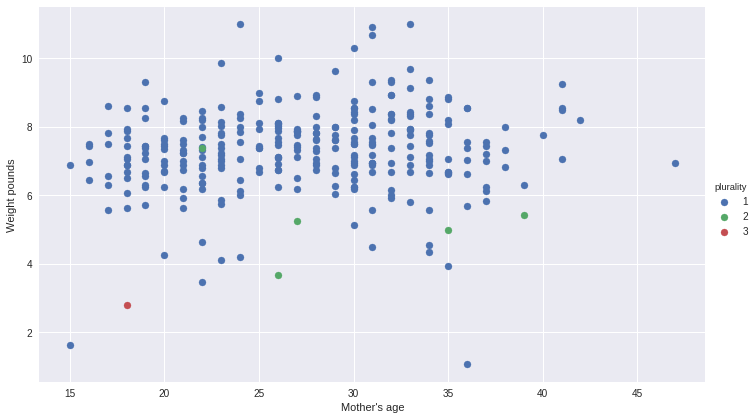

In [6]:
import seaborn
from  matplotlib import pyplot as plt
#plt(data)
fg = seaborn.FacetGrid(data=data, hue='plurality', size=6,aspect=1.67)
fg = fg.map(plt.scatter, 'mother_age' ,'weight_pounds').add_legend()
fg = fg.set_axis_labels(x_var="Mother's age", y_var="Weight pounds")

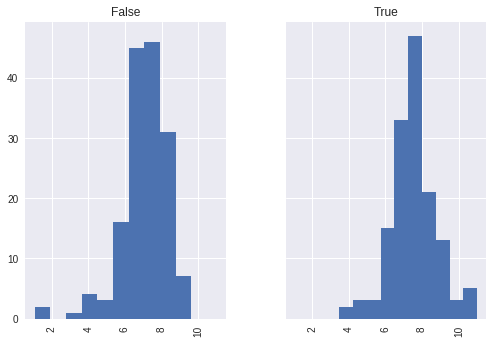

In [7]:
_ = data.hist(column='weight_pounds',by='is_male', layout=(1,2),  sharey=True, sharex=True)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


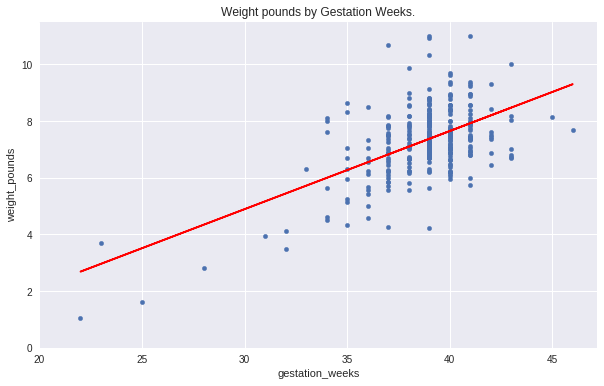

In [8]:
import numpy as np
x = data.gestation_weeks
y = data.weight_pounds
data.plot(kind="scatter",x="gestation_weeks",y="weight_pounds", figsize=[10,6],ylim=0,xlim=20)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r")
plt.title("Weight pounds by Gestation Weeks.")
plt.show()

## 特徴量の設定

データセットを見てみると、出生時体重を適切に予測するために活用できそうな、いくつかの列があります。BQMLでは、すべての文字列はカテゴリカル機能と見なされ、すべての数値型は連続値と見なされます。
ハッシュ化された年月を追加することで、同様の誕生日の赤ちゃんのデータをトレーニングセットとテストセットにバランスよく分割します。

In [9]:
%%bigquery --project {project_id}
SELECT
    weight_pounds, -- 回帰分析のラベルとして使用します。
    is_male,
    mother_age,
    plurality,
    gestation_weeks,
    ABS(FARM_FINGERPRINT(CONCAT(CAST(YEAR AS STRING), CAST(month AS STRING)))) AS hashmonth
FROM
  publicdata.samples.natality
WHERE
  year > 2000
  AND gestation_weeks > 0
  AND mother_age > 0
  AND plurality > 0
  AND weight_pounds > 0
LIMIT 10

,weight_pounds,is_male,mother_age,plurality,gestation_weeks,hashmonth
0,7.063611,True,32,1,37,7108882242435606404
1,4.687028,True,30,3,33,7170969733900686954
2,7.561856,True,20,1,39,6392072535155213407
3,7.561856,True,31,1,37,2126480030009879160
4,7.312733,True,32,1,40,3408502330831153141
5,7.627994,False,30,1,40,2126480030009879160
6,7.251004,True,33,1,37,3408502330831153141
7,7.500126,False,23,1,39,5896567601480310696
8,7.125340,False,33,1,39,7146494315947640619
9,7.749249,True,31,1,39,7146494315947640619


## モデルのトレーニング

予測に使用する列を選択することで、BigQueryでモデルを作成（トレーニング）することが可能になります。まず、モデルを保存するためのデータセットが必要になります。 （エラーが発生した場合は、BigQueryコンソールからデータセットを作成してください）。

In [10]:
!gcloud config set project {project_id}
!bq --location=US mk -d demo

Updated property [core/project].

Welcome to BigQuery! This script will walk you through the 
process of initializing your .bigqueryrc configuration file.

First, we need to set up your credentials if they do not 
already exist.

Credential creation complete. Now we will select a default project.

List of projects:
  #        projectId           friendlyName    
 --- ---------------------- ------------------ 
  1   canvas-advice-232305   My First Project  
  2   certain-math-232306    My First Project  
Found multiple projects. Please enter a selection for 
which should be the default, or leave blank to not 
set a default.

Enter a selection (1 - 2): 2

BigQuery configuration complete! Type "bq" to get started.

Dataset 'certain-math-232306:demo' successfully created.


デモデータセットの準備が整ったら、線形回帰モデルを作成してモデルを訓練することができます。
実行には約** 4分**かかります。

In [11]:
%%bigquery --project {project_id}
CREATE or REPLACE MODEL demo.babyweight_model_asis
OPTIONS
  (model_type='linear_reg', labels=['weight_pounds']) AS
  
WITH natality_data AS (
  SELECT
    weight_pounds,-- 回帰分析のラベル
    is_male AS is_male,
    mother_age,
    plurality,
    gestation_weeks,
    ABS(FARM_FINGERPRINT(CONCAT(CAST(YEAR AS STRING), CAST(month AS STRING)))) AS hashmonth
  FROM
    publicdata.samples.natality
  WHERE
    year > 2000
    AND gestation_weeks > 0
    AND mother_age > 0
    AND plurality > 0
    AND weight_pounds > 0
)

SELECT
    weight_pounds,
    is_male,
    mother_age,
    plurality,
    gestation_weeks
FROM
    natality_data
WHERE
  MOD(hashmonth, 4) < 3  -- select 75% of the data as training
LIMIT 19

""


In [12]:
data.weight_pounds.mad() # MAE, MAD = Mean Absolute Error, Mean Absolute Difference

0.9096165148569687

## モデルの精度

上記の平均絶対誤差 (`mean_absolute_error`) 値 `1.05`. よりも下回れば、期待した精度になっていると言えます。平均絶対誤差は、予測ラベルと実際のラベルとの差の平均値です。


In [13]:
%%bigquery --project {project_id} df
select * from ml.EVALUATE(MODEL demo.babyweight_model_asis);

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,0.860462,1.254632,0.01693,0.830868,-1.341889,-1.258957


## BQML モデルで予測を実行

訓練されたモデルで値を予測することが可能になりました。

`ml.predict`関数を利用すると、モデルの出力予測列名は` predicted_ <label_column_name> `になります。

In [14]:
%%bigquery --project {project_id}
SELECT
  *
FROM
  ml.PREDICT(MODEL demo.babyweight_model_asis,
      (SELECT
        weight_pounds,
        is_male,
        mother_age,
        plurality AS plurality,
        gestation_weeks
      FROM
        publicdata.samples.natality
      WHERE
        year > 2000
        AND gestation_weeks > 0
        AND mother_age > 0
        AND plurality > 0
        AND weight_pounds > 0
    ))
LIMIT 10

,predicted_weight_pounds,weight_pounds,is_male,mother_age,plurality,gestation_weeks
0,8.956159,5.937049,False,41,1,38
1,7.092877,6.874013,False,19,1,40
2,7.092877,8.000575,False,19,1,40
3,6.987056,8.062305,True,25,1,40
4,8.013891,7.561856,False,25,1,37
5,6.370213,7.639017,False,33,2,39
6,7.350002,5.941458,False,35,2,34
7,7.875082,6.128851,False,23,1,37
8,7.301089,9.124933,False,22,1,40
9,8.024518,7.500126,False,30,1,39


28際の母親から38週で生まれた赤ちゃんの体重を以下のように予測してみます。

In [15]:

%%bigquery --project {project_id}
SELECT
  *
FROM
  ml.PREDICT(MODEL demo.babyweight_model_asis,
      (SELECT
          TRUE AS is_male,
          28 AS mother_age,
          1 AS plurality,
          38 AS gestation_weeks
    ))

,predicted_weight_pounds,is_male,mother_age,plurality,gestation_weeks
0,7.531661,True,28,1,38
